# Principal Component Analysis
PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve variance in the data as best it can.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from itertools import cycle
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
print(iris.data.shape)
print(iris.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


Data set has 150 samples (individual flowers) in it. It has 4 dimensions - called features here, and three distinct Iris species that each flower is classified into.
Let's distill this down to 2 dimensions, and see how well it works:

In [3]:
X = iris.data
pca = PCA(n_components=2,whiten=True).fit(X)
X_pca = pca.transform(X)

In [4]:
print(X_pca.shape)
print(pca.components_)

(150, 2)
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Let's see how much information we've managed to preserve:

In [5]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


PCA model able to capture variance of 92% and 5% of selected two dimensions. Total of 97.76% varience is still preserved even after removing other two dimensions.

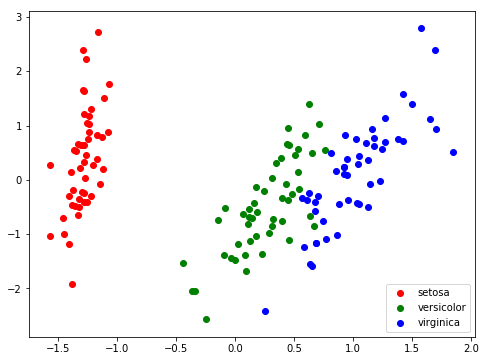

In [6]:
#As reduced data is in 2 dimensions, we can plot it graphically. Let's plot the iris flowers with species
c=cycle('rgb')
plt.figure(figsize=(8,6))
targets = range(len(iris.target_names))
for target,label,c in zip(targets,iris.target_names,c):
    plt.scatter(X_pca[iris.target == target,0],X_pca[iris.target == target,1],c=c,label=label)
plt.legend(loc=4)
plt.show()